# TITANIC - MACHINE LEARNING COMPETITION

#### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory Data Analysis

In [32]:
#removing Name and Ticket Number columns from the training data 
train_df = pd.read_csv('train.csv').drop(columns = ['Name','Ticket'])
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


### 1.1 Null Values on the data.

In [33]:
#Identifying the null values on dataset.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2.1 Feature Exploration
#### 1.2.1 Gender 

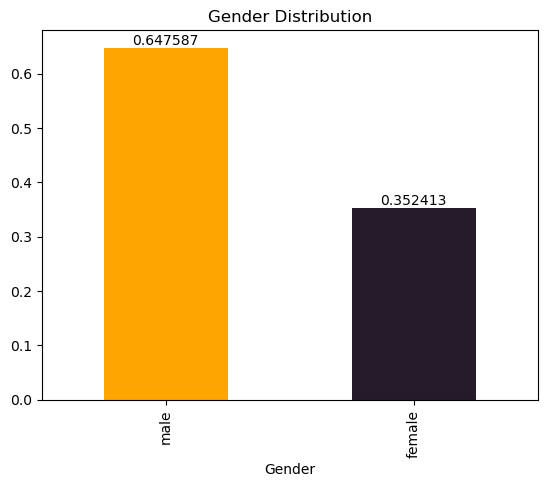

In [34]:
ax = train_df.value_counts('Sex', normalize = True).plot(kind = 'bar', color = ['orange','#261b2b'], xlabel = 'Gender', title = 'Gender Distribution')

#labeling the values for each column in the chart
for i in ax.containers:
    ax.bar_label(i)

#### **MALE**: 64.8%           
#### **FEMALE**: 35.2%

#### 1.2.2 Age

Text(0.5, 1.0, 'Histogram by age')

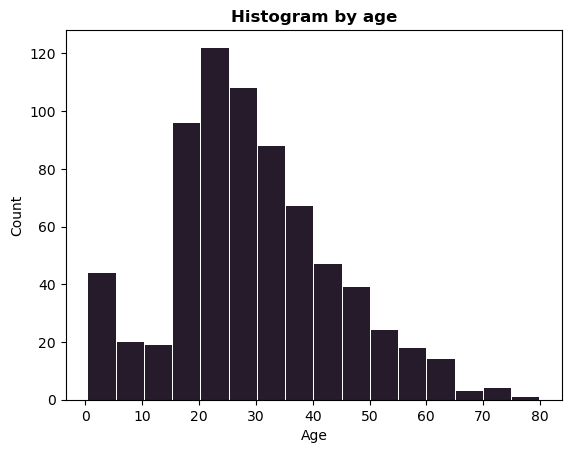

In [35]:
#create an histogram 
import math 
max(train_df['Age'])
plt.hist(train_df['Age'], bins = 16, color = '#261b2b', rwidth = 0.96, density = False)
plt.xlabel('Age')
plt.ylabel('Count')
 
plt.title('Histogram by age',
          fontweight = "bold")

From the known passenger's age, about **18% of them had 20-25 y.o**.

However, it is important to keep in mind there's **177 unlabeled passengers**.

In [36]:
train_df.dropna(inplace=True)

In [37]:
train_df.drop(columns = ['Cabin','Parch'],inplace=True)

In [38]:
encodtraindf = pd.get_dummies(train_df, columns = ['Sex', 'Embarked'])

In [39]:
encodtraindf.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,0.029740,0.025205,-0.025205,-0.034101,-0.053701,0.045466
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.134241,0.532418,-0.532418,0.104870,-0.038544,-0.095861
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,-0.315235,0.046181,-0.046181,-0.231837,-0.039131,0.238755
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.092424,-0.184969,0.184969,0.085018,0.019038,-0.088568
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.286433,0.104291,-0.104291,-0.056723,0.169446,0.019780
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,1.000000,0.130433,-0.130433,0.240382,0.015625,-0.242172
Sex_female,0.025205,0.532418,0.046181,-0.184969,0.104291,0.130433,1.000000,-1.000000,0.062691,0.004024,-0.063146
Sex_male,-0.025205,-0.532418,-0.046181,0.184969,-0.104291,-0.130433,-1.000000,1.000000,-0.062691,-0.004024,0.063146
Embarked_C,-0.034101,0.104870,-0.231837,0.085018,-0.056723,0.240382,0.062691,-0.062691,1.000000,-0.078017,-0.976579
Embarked_Q,-0.053701,-0.038544,-0.039131,0.019038,0.169446,0.015625,0.004024,-0.004024,-0.078017,1.000000,-0.138314


<Axes: >

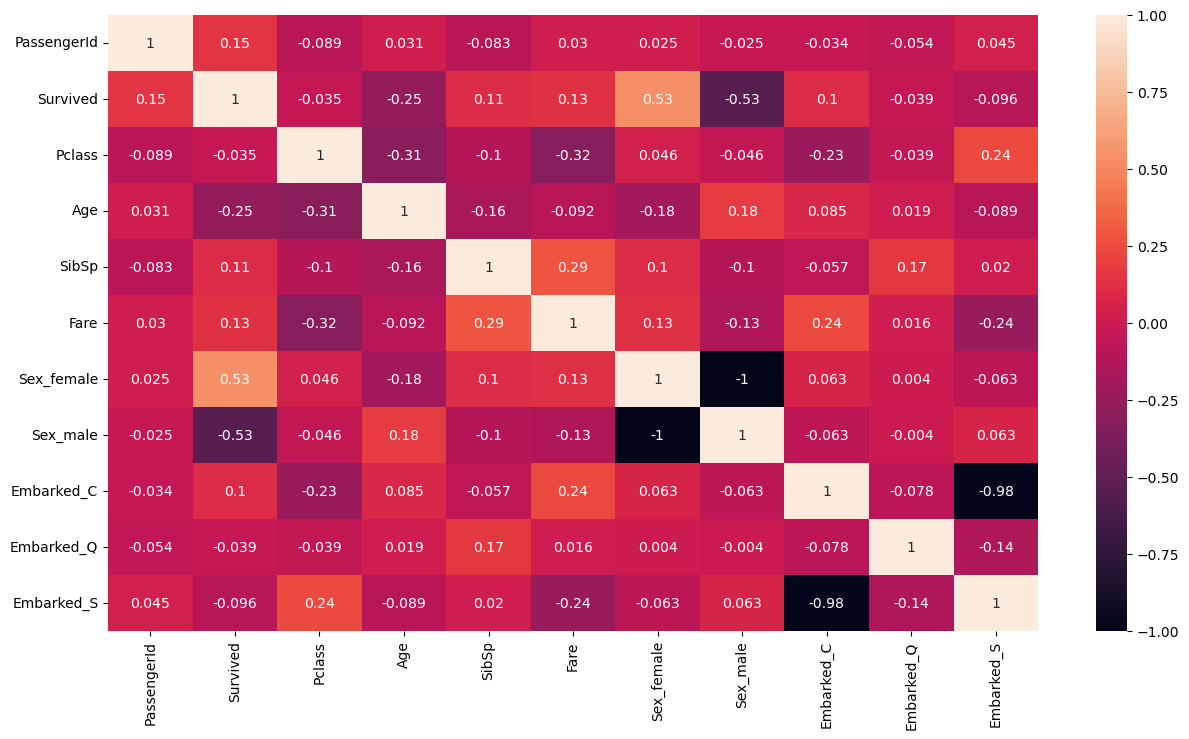

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(encodtraindf.corr(),annot=True,cmap="rocket")

#### 1.2.3 Embarked Port

In [41]:
#counting how many passangers embarked in each port.
train_df['Embarked'].value_counts(dropna = False)

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

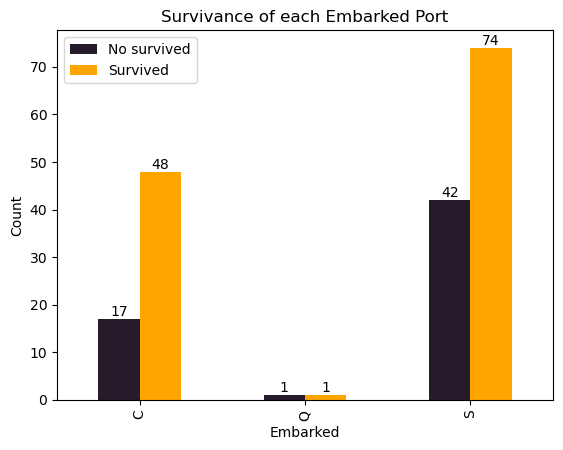

In [42]:
#group the passangers by ticket class
class_embarked = train_df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

#plotting the Survivance vs Embarked Port chart 
graphEmbarked = class_embarked.plot(kind='bar', color = ['#261b2b','orange'], xlabel = 'Embarked', ylabel = 'Count', title = 'Survivance of each Embarked Port')

#labeling the values for each column in the chart.
for i in graphEmbarked.containers:
    graphEmbarked.bar_label(i)

#legends
graphEmbarked.legend(['No survived','Survived'])

#### C: Cherbourg ----- Q: Queenstown ----- S: Southampton

#### 1.2.4 Passenger Class

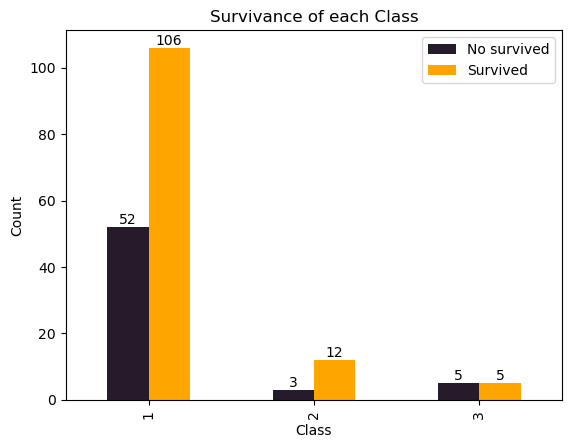

In [43]:
#group the passangers by ticket class
class_surv = train_df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

#plotting the Survivance vs Class chart
graphClass = class_surv.plot(kind='bar', color = ['#261b2b','orange'], xlabel = 'Class', ylabel = 'Count', title = 'Survivance of each Class',)

#labeling the values for each column in the chart.
for i in graphClass.containers:
    graphClass.bar_label(i)

#legends 
graphClass.legend(['No survived','Survived'])

In [44]:
#create an organized table showing how many passangers are in each category.
class_embarked = train_df.groupby(['Pclass','Embarked', 'Survived']).size().unstack(fill_value=0)
class_embarked

Survived          0   1
Pclass Embarked        
1      C         16  47
       Q          1   1
       S         35  58
2      C          1   1
       S          2  11
3      S          5   5

In [45]:
from sklearn import preprocessing 

In [46]:
ind_var = encodtraindf.drop(columns='Survived',axis=1)

In [47]:
transform = preprocessing.StandardScaler()

x = transform.fit_transform(ind_var) 
x

array([[-1.84013507, -0.37225618,  0.14906507, ...,  1.3473621 ,
        -0.10511767, -1.31580518],
       [-1.83201742, -0.37225618, -0.0432295 , ..., -0.74219098,
        -0.10511767,  0.75999093],
       [-1.81984093, -0.37225618,  1.17463611, ..., -0.74219098,
        -0.10511767,  0.75999093],
       ...,
       [ 1.72351585, -0.37225618,  1.30283248, ...,  1.3473621 ,
        -0.10511767, -1.31580518],
       [ 1.75598648, -0.37225618, -1.06880054, ..., -0.74219098,
        -0.10511767,  0.75999093],
       [ 1.76410413, -0.37225618, -0.62011321, ...,  1.3473621 ,
        -0.10511767, -1.31580518]])

In [48]:
y = encodtraindf['Survived'].to_numpy()
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred = rfc.predict(x_test)
training_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy: %.3f " % training_accuracy)

Training Accuracy: 0.730 


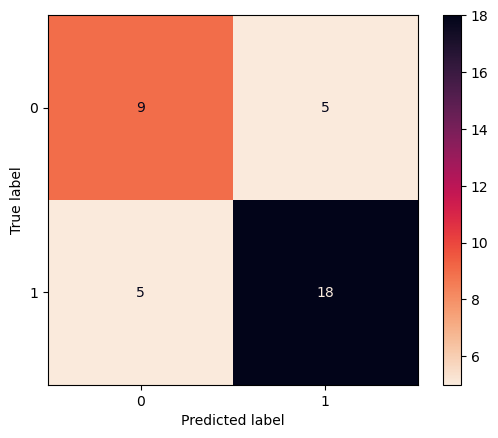

In [65]:
cm = confusion_matrix(y_test,y_pred, labels = rfc.classes_)

displayCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['0','1'])

displayCM.plot(cmap='rocket_r')